In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

output_score = list(range(12))
y = [0,0,0,0,1,0,1,1,0,1,1,1]
p = list(range(0,11,1))
p = [i / 10 for i in p]


cost10 = 3
cost11 = 2

theta = list(range(12))
theta = [i+0.5 for i in theta]

def threshold_judge(output_score,threshold):
    output_result = []
    for i in output_score:
        if i >= threshold:
            output_result.append(1)
        else:
            output_result.append(0)
    return output_result

def confusion_matrix(y_ture,y_pred):
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    for i in range(len(y_ture)):
        if y_ture[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y_ture[i] == 1 and y_pred[i] == 0:
            FN += 1
        elif y_ture[i] == 0 and y_pred[i] == 1:
            FP += 1
        else:
            TN += 1
    return TP,FN,FP,TN

def calculate_FNR_FPR(TP,FP,TN,FN):
    FNR = round(FN/(TP+FN),4)
    FPR = round(FP/(FP+TN),4)
    return FNR,FPR

def calculate_positive_cost(p,cost01,cost10):
    positive_costs = []
    for i in p:
        positive_cost = round((i*cost01)/(i*cost01+(1-i)*cost10),4)
        positive_costs.append(positive_cost)
    return positive_costs

def calcuate_negative_cost(p,cost01,cost11,FNR,FPR):
    negative_costs = []
    for i in p:
        negative_cost = round((FNR*i*cost01+FPR*(1-i)*cost10)/(i*cost01+(1-i)*cost10),4)
        negative_costs.append(negative_cost)
    return negative_costs

output_score = threshold_judge(output_score,0.5)
TP,FN,FP,TN = confusion_matrix(y,output_score)
FNR,FPR = calculate_FNR_FPR(TP,FP,TN,FN)
positive_costs = calculate_positive_cost(p,cost10,cost11)
negative_costs = calcuate_negative_cost(p,cost10,cost11,FNR,FPR)

print(FNR,FPR)
plt.plot(positive_costs,negative_costs,label='Positive Cost')
plt.show()


In [ ]:
# 数据分割，去除当前特征
def splitDataset(dataset,index,value):
    # 创建一个新列表，用于存储分割后的数据
    retDataset = []
    # 遍历数据集，将满足条件的数据添加到新列表
    for featVec in dataset:
        if featVec[index] == value:
            reducedFeatVec = featVec[:index]
            reducedFeatVec.extend(featVec[index+1:])
            print(reducedFeatVec)
            retDataset.append(reducedFeatVec)
    return retDataset

dataset = [[0,1,1,1],
           [1,0,1,1],
           [1,0,0,0],
           [1,1,1,0]]

res = splitDataset(dataset,1,0)
print(res)

In [ ]:
import numpy as np

def bootstrapping(X,y):
    trainIndex = np.random.choice(len(X),size = len(X),replace=True)
    X_train,y_train = X[trainIndex],y[trainIndex]
    testIndex = np.setdiff1d(np.arange(len(X)),trainIndex)
    X_test,y_test = X[testIndex],y[testIndex]
    return X_train,y_train,X_test,y_test

X = np.arange(3000).reshape(1000,3)
y = np.random.choice([0,1],size = 1000)

X_train,y_train,X_test,y_test = bootstrapping(X,y)

print(len(X_test))
    

In [ ]:
from scipy.special import comb
import matplotlib.pyplot as plt

# 测试错误率
Test_error = 0.3
# 数据集大小
N = 10
# 计算某个错误率的概率
def caculate_prob(N,error_N):
    P = comb(N,error_N)*Test_error**(error_N)*(1-Test_error)**(N-error_N)
    P = round(P,3)
    return P

# 计算所有错误率的概率
def caculate_all_prob():
    error_N = list(range(N+1))
    probs = []
    for i in error_N:
        prob = caculate_prob(N,i)
        probs.append(prob)
    return error_N,probs

# 画图
error_N,probs = caculate_all_prob()
plt.scatter(error_N,probs,c='r')


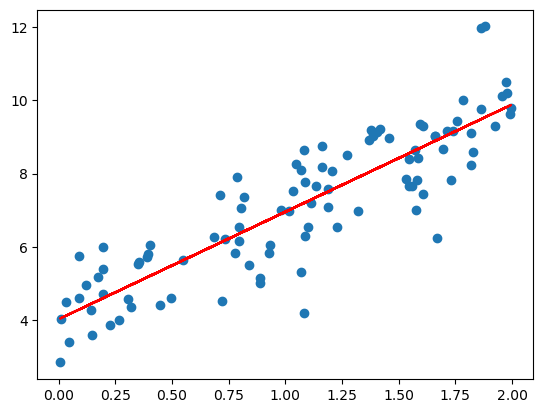

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
X = 2 * np.random.rand(100,1)
Y = 4 + 3 * X + np.random.randn(100,1)

# 画散点图
plt.scatter(X,Y)

# X后面添加一列
X_b = np.c_[X,np.ones((100,1))]

# 计算回归系数
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

# 计算回归线
y = X_b.dot(w)

# 画回归线
plt.plot(X,y,color='r')
plt.show()


In [ ]:
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from matplotlib import cm

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def init_xy():
    sheet1 = openpyxl.load_workbook('./xigua3.0.xlsx')['Sheet1']
    x = np.zeros((2,17))
    y = np.zeros((1,17))
    for i in range(17):
        x[0][i] = sheet1[chr(ord('A')+i)+'1'].value
    for i in range(17):
        x[1][i] = sheet1[chr(ord('A')+i)+'2'].value
    for i in range(17):
        y[0][i] = sheet1[chr(ord('A')+i)+'3'].value
    return x.T, y.T
    
def function_p1(x_hat, b):
    a = np.math.exp(np.dot(np.transpose(b), x_hat))
    return a / (1+a)
    
def function_p2(x, b):
    return 1 - function_p1(x, b)

def train():
    x,y = init_xy()
    b = np.ones((3,1))
    dl_sub = 0
    train_n = 2000
    step_size = 0.1
    
    for step in range(train_n):
        dl = 0
        for i in range(17):
            x_t = x[i]
            x_hat = np.append(x_t, 1)
            x_hat = x_hat.reshape(3,1)
            dl_sub = np.dot(x_hat, y[i][0] - function_p1(x_hat, b))
            dl += dl_sub
        b = b + step_size * dl
    return b

def test(x, y, b):
    right = 0
    for i in range(17):  
        x_hat = np.append(x[i], 1)
        y_pre = sigmoid(np.dot(b.T, x_hat))
        if (y_pre >= 0.5 and y[i] == 1) or (y_pre < 0.5 and y[i] == 0):
            right += 1
            
    print("正确率为:", right/17)

b = train()
x,y = init_xy()
test(x, y, b)


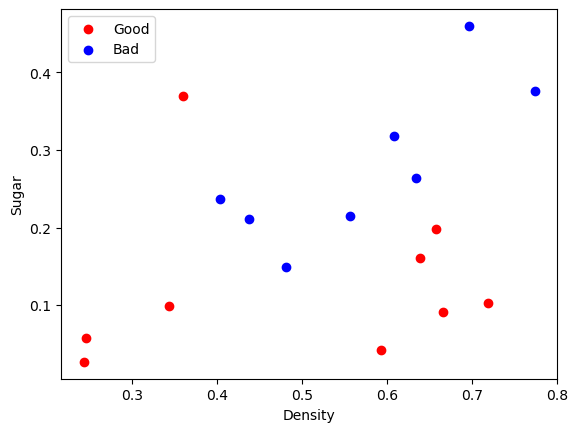

17


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 载入数据
dataset = np.loadtxt('../machine learning note/watermelon_3a.csv', delimiter=',')
X = dataset[:,1:3]
Y = dataset[:,3]

# 绘制散点图
plt.scatter(X[Y==0][:,0],X[Y==0][:,1],color='red',label='Good')
plt.scatter(X[Y==1][:,0],X[Y==1][:,1],color='blue',label='Bad')
plt.xlabel('Density')
plt.ylabel('Sugar')
plt.legend()
plt.show()

# Sigmoid函数
def sigmoid(X,beita):
    return 1.0 / (1+np.exp(-np.dot(beita,X.T)))

# 分布率
def likelihood_sub(X,y,beita):
    return -y * np.dot(beita.T,X) + np.math.log(1 + np.exp(np.dot(beita.T,X)))

# 似然函数
def likelihood(X,y,beita):
    num = len(y)
    sum = 0
    for i in range(num):
        sum += likelihood_sub(X[i],y[i],beita)
    return sum

# 一阶偏导
def partial_derivative(X,y,beita):
    num = len(y)
    
